In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/My Drive/datasets/polynomial_regression_train.csv'
data=pd.read_csv(file_path)
matrix = data.iloc[:, 1:].values

Mounted at /content/drive


 0:    J: 5.780208561722046e-17 , w: [1.27426155e-12 1.11783329e-13 1.45711394e-12 7.51134498e-13
 1.51942507e-13], b:-2.918905689230291e-13
 100:    J: 3.410403843492418e-17 , w: [ 6.50524416e-11 -6.87208488e-13  3.80224123e-11  2.01550130e-11
 -7.11557943e-13], b:-8.4207157839959e-12
 200:    J: 2.75258485796024e-17 , w: [ 9.54608793e-11 -5.92159645e-12  3.49584664e-11  2.21325723e-11
 -6.83617681e-12], b:-8.612875268645663e-12
 300:    J: 2.541220489581764e-17 , w: [ 1.20461512e-10 -1.09479459e-11  3.03673167e-11  2.38544184e-11
 -1.30774711e-11], b:-8.975475313780262e-12
 400:    J: 2.469184904301178e-17 , w: [ 1.42851812e-10 -1.56213251e-11  2.56392128e-11  2.55687414e-11
 -1.91446686e-11], b:-9.648051084657829e-12
 500:    J: 2.4422972738791514e-17 , w: [ 1.63390402e-10 -1.99816704e-11  2.09575351e-11  2.72425118e-11
 -2.49628030e-11], b:-1.052911077331874e-11
 600:    J: 2.430628703482715e-17 , w: [ 1.82448646e-10 -2.40695370e-11  1.63895374e-11  2.88577010e-11
 -3.05142544e-11]

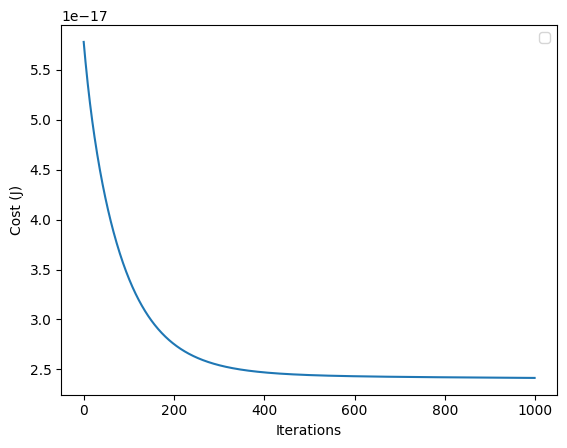

Cross-validation cost: 2.3433546454543472e-17


In [20]:
import numpy as np
import matplotlib.pyplot as plt

for r in range(5):
  matrix[:, r] = (matrix[:, r] - np.mean(matrix[:, r])) / np.std(matrix[:, r])
degree=5

n_samples, n_features = matrix[:, :5].shape
X_poly=matrix[:, :5].copy()
for d in range(1, degree):
            for i in range(n_features):
                for j in range(i, n_features):
                    interaction_term =((matrix[:, i] ** d) * matrix[:, j]).reshape(-1, 1)
                    X_poly = np.hstack((X_poly, interaction_term))

w = np.zeros(X_poly.shape[1])
b = 0
l = 0.1
alpha = 0.001
y1 = np.zeros(32000)
n = 1000
j = np.zeros(n)

for m in range(n):
  y1 = np.dot(X_poly[:32000, :], w) + b
  e = y1 - matrix[:32000, 5]
  j[m] = (np.sum(e**2) / (2 * 32000)) + (l * np.sum(w**2))
  dj_dw = (np.dot(e, X_poly[:32000, :]) / 32000) + 2 * l * w
  dj_db = np.sum(e) / 32000
  w -= alpha * dj_dw
  b -= alpha * dj_db

  if m % 100 == 0:
    print(f" {m}:    J: {j[m]} , w: {w[:5]}, b:{b}")

p = np.arange(n)
plt.plot(p, j)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.show()

y1_cv = np.dot(X_poly[32000:, :], w) + b
cv_cost = np.sum((y1_cv - matrix[32000:, 5])**2) / (2 * 16000) + (l * np.sum(w**2))
print(f"Cross-validation cost: {cv_cost}")




In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path1='/content/drive/My Drive/datasets/polynomial_regression_test.csv'
data1=pd.read_csv(file_path1)
matrix1 = data1.iloc[:, 1:].values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_poly_test = gen_features(matrix1[:, :5], degree=5)
y1_test = np.dot(X_poly_test, w) + b
